# Analysis of data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.interpolate import interp1d
from scipy.integrate import odeint
import math

#### Functions to read data in

In [2]:
def read_times(file):
    times = []
    f = open(file,'r')
    with f:
        reader = csv.reader(f,quotechar='"')
        times = [float(row[0]) for row in reader]
    f.close()
    return times

def read_proteins(file):
    proteins = []
    f = open(file,'r')
    with f:
        reader = csv.reader(f,quotechar='"')
        for row in reader:
            l = []
            for r in row: l.append(float(r))
            proteins.append(l)
    f.close()
    return proteins

#### Pull in and interpolate data

In [ ]:
trialcount = 47 # Make sure to use full trial count
runtime = 660 # Make sure it's same as stochastic
proteincount = 19

times = []
proteins = []

t_data = np.arange(0, runtime, 0.001)
p_data = []

for i in range(0, trialcount):
    times.append(read_times('time-trials/time-'+str(i)+'.csv'))
    proteins.append(read_proteins('protein-trials/proteins-trial-'+str(i)+'.csv'))
        
    # Interpolate Results
    p_interp = []
    
    for j in range(0, proteincount):
        p_indiv = []

        for k in range(0, len(proteins[i])):
            p_indiv.append(proteins[i][k][j])
            
        p_interp_func = interp1d(times[i], p_indiv, kind = 'nearest', fill_value="extrapolate")
        p_new = p_interp_func(t_data)
        
        p_interp.append(p_new)
        
    p_data.append(p_interp)    

#### Visual Interpolation Check (plots should match up)

In [ ]:
for i in range(0, trialcount):
    # plot the stochastic solution
    plt.plot(times[i], proteins[i])
    plt.title(label = 'Random Walk: Trial '+str(i))
    plt.show()
    
    # plot the interpolated data
    for j in range(0, proteincount):
        plt.plot(t_data, p_data[i][j])
    plt.title(label = 'Interpolated Walk: Trial '+str(i))
    plt.show()

#### Plot 0th trial

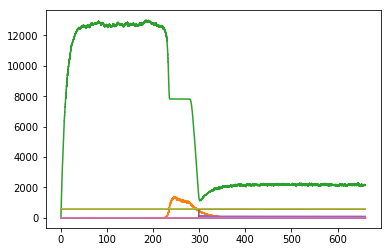

In [5]:
times = read_times('time-trials/time-'+str(0)+'.csv')
proteins = read_proteins('protein-trials/proteins-trial-'+str(0)+'.csv')
plt.plot(times, proteins)
plt.show()

#### Calculate Mean over trialcount

In [ ]:
mean_array = []
for j in range(0, proteincount):
    p_avg = []
    for i in range(0, trialcount):
        p_avg.append(p_data[i][j])
    p_avg = np.asarray(p_avg)
    p_avg = np.transpose(p_avg)
    p_avg = p_avg.mean(axis=1)
    mean_array.append(p_avg)

#### Graph the mean data

In [ ]:
for j in range(0, proteincount):
    plt.plot(t_data, mean_array[j])
plt.title(label='Mean Through '+str(trialcount)+' Trials')
plt.show()

#### Calculate error over trialcount

In [ ]:
p_data = np.asarray(p_data)
mean_array = np.asarray(mean_array)

y_err = np.sqrt((((p_data-mean_array)**2).sum(axis=0))/(trialcount-1))

#### plot data with error bars

In [ ]:
for j in range(0, proteincount):
    plt.errorbar(t_data, mean_array[j], yerr = y_err[j])
    plt.plot(t_data, mean_array[j])
plt.show()

#### Deterministic Solution

In [ ]:
## VOLUME CONSTANTS
V = 10e-12
NA = 6.023e23
vna = V*NA*10e-9*10e-3
ivna = 1/vna

##PARAMETERS
#Synthesis and degradation of Clb1 :
kClb1s = 0.002
kClb1sp = 0.2
kClb1spp = 0.1
kClb1d = 0.1
kClb1dp = 0.2
kClb1dpp = 0.02
#NOTE : Decreasing Clb1 intrinsic decay rate widens Clb3 duration
kClb3s = 0.002
kClb3sp = 0.5
kClb3d = 0.2
kClb3Cdc20d = 0.2
#Cdc20
kCdc20s = 0.2
kCdc20d = 0.1
kCdc20Clb1p = 0.1
kCdc20Clb3p = 0.1
kCdc20a = 0.1
JCdc20Clb3 = 0.1
JCdc20clb1 = 0.1
JCdc20 = 0.1
kClb1Cdc20d = 0.3
kClb3Cdc20d = 0.3
#Clb1 phosophorylation of Cdc20 weaker than Clb3
#Synthesis and degradation of Clb4 :
kClb4s = 0.2
kClb4sp = 0.1
kClb4d = 0.2
kClb4dp = 1
kClb4dpp = 0.02
#Activation and inactivation of SP :
kSPa = 2
kSPi = 2
JSP = 0.01
#Synthesis, degradation, activation, and inactivation of Cdc5 :
kCdc5s = 0.004
kCdc5sp = 0.03
kCdc5spp = 0.02
kCdc5d = 0.02
kCdc5dp = 0.06
kCdc5dpp = 0.002
kCdc5a = 0.1
kCdc5ap = 0.4
kCdc5app = 0.3
kCdc5i = 0.1
#Synthesis, degradation, activation, and inacti - vation of Ndd1 :
kNdd1s = 0.03
kNdd1d = 0.0001
kNdd1dp = 1
kNdd1dpp = 0.02
kNdd1a = 0.1
kNdd1ap = 0.2
kNdd1app = 0.04
kNdd1i = 0.2
JNdd1 = 0.04
#Degradation of Hcm1 :
kHcm1d = 0.02
#Regulation of Ndt80 :
kNdt80s = 0.01
kNdt80sp = 2
kNdt80d = 0.3
JNdt80p = 0.2
alpha = 1
beta = 0.1
ki = 0.01
#degradation of Ndt80 by Ama1 :
kNdt80dp = 0.6
#Regulation of Sum1 :
kSum1i = 0.025
kSum1a = 0.000001
kSum1ip = 0.1
kSum1ipp = 1
kSum1ap = 0.01
kSum1ippp = 0.25
kSum1app = 1
#Regulation of Ama1 :
kAma1a = 0.1
kAma1i = 0.0
kAma1ip = 0.1
JAma1 = 0.1
kAIas = 10
kAIds = 1
kAma1clb3p = 0.1
#Faster rate of Ama1 phosphorylation by Clb1
#Synthesis and degradation of the additional Ama1 - inhibitor (AI) :
kAIs = 0.1
kAId = 0.15
#Activation and inactivation of the RC :
kRCa = 1
kRCi = 0.1
kRCip = 2
JRC = 0.01
#Repair of DSBs :
kDSBi = 0.02
kdmRNA = 0.1
kRim4mRNA = 100
kAma1dp = 0.01
kAma1exp = 0.08
kAma1s = 0.01

def ode_system(p,t):
    # time functions
    kDSBi = 0.02
    Sum1T = 1*vna
    Dmc1 = 1*vna
    Sum1I = lambda t: p[12]*p[13]*p[14]/(Sum1T * Sum1T)
    JNdt80 = lambda t: JNdt80p*(vna+(alpha*(Sum1T-p[12])+beta*(p[12]-Sum1I(t)))/ki)
    Ama1 = lambda t: p[18]-p[15] 
    Rim4 = lambda t: (1-math.tanh(0.2*(t-240)))/2
    
    # system equations
    clb1_dt = kClb1s*vna + kClb1sp*p[11] - kClb1d*p[0] - kClb1dp*Ama1(t)*p[0]*ivna - kClb1Cdc20d*p[3]*p[0]*ivna
    clb3_dt = kClb3s*vna - kClb3d*p[1] - kClb3Cdc20d*p[3]*p[1]*ivna + 5*kClb3sp*math.exp(-(t-240)/25)*vna - 5*kClb3sp*math.exp(-(t-240)/25)*Rim4(t)*vna
    cdc20T_dt = kCdc20s*vna - kCdc20d*p[2]
    cdc20_dt = (kCdc20Clb1p*p[0]*p[2])/(JCdc20clb1*vna+p[2]-p[3]) + (-kCdc20Clb1p*p[0]*p[3])/(JCdc20clb1*vna+p[2]-p[3]) + (kCdc20Clb3p*p[1]*p[2])/(JCdc20Clb3*vna+p[2]-p[3]) + (-kCdc20Clb3p*p[1]*p[3])/(JCdc20Clb3*vna+p[2]-p[3]) - kCdc20a*p[3]*vna/(JCdc20*vna+p[3]) - kCdc20d*p[3]
    clb4_dt = kClb4s*vna + kClb4sp*p[11] - kClb4d*p[4] - kClb4dp*Ama1(t)*p[4]*ivna
    sp_dt = (kSPa*vna*p[0])/(JSP*vna+vna-p[5]) + (kSPa*vna*p[4])/(JSP*vna+vna-p[5]) - (kSPa*p[0]*p[5])/(JSP*vna+vna-p[5]) - (kSPa*p[4]*p[5])/(JSP*vna+vna-p[5]) - kSPi*vna*p[5]/(JSP*vna+p[5])
    cdc5t_dt = kCdc5s*vna + kCdc5sp*p[11] - kCdc5d*p[6] - kCdc5dp*Ama1(t)*p[6]*ivna
    cdc5a_dt = kCdc5a*p[6] + kCdc5ap*p[0]*p[6]*ivna + kCdc5app*p[4]*p[6]*ivna - kCdc5a*p[7] - kCdc5ap*p[0]*p[7]*ivna - kCdc5app*p[4]*p[7]*ivna - kCdc5i*p[7] - kCdc5d*p[7] - kCdc5dp*Ama1(t)*p[7]*ivna
    ndd1t_dt = 0
    ndd1a_dt = 0
    hcm1_dt = -kHcm1d*p[10]
    ndt80_dt = kNdt80s*vna + kNdt80sp*vna*p[11]/(JNdt80(t)+p[11]) - kNdt80d*p[11] - kNdt80dp*Ama1(t)*p[11]*ivna
    sum1iIme2_dt = kSum1i*Sum1T - kSum1i*p[12] - kSum1a*p[12]
    sum1iCdk1_dt = kSum1ip*Sum1T + kSum1ipp*Sum1T*p[0]*ivna + kSum1ipp*Sum1T*p[4]*ivna - kSum1ip*p[13] - kSum1ipp*p[13]*p[0]*ivna - kSum1ipp*p[13]*p[4]*ivna - kSum1ap*p[13]
    sum1iRC_dt = kSum1ippp*Sum1T - kSum1ippp*p[14] - kSum1app*p[16]*p[14]*ivna  
    ama1p_dt = (kAma1i*p[18]*vna)/(JAma1*vna+p[18]-p[15]) + (kAma1ip*p[0]*p[18]*ivna*vna)/(JAma1*vna+p[18]-p[15]) + (-kAma1i*vna*p[15])/(JAma1*vna+p[18]-p[15]) + (-kAma1ip*p[0]*p[15]*ivna*vna)/(JAma1*vna+p[18]-p[15]) - kAma1a*vna*p[15]/(JAma1*vna+p[15]) + (kAma1clb3p*p[1]*p[18]*ivna*vna)/(JAma1*vna+p[18]-p[15]) + (-kAma1clb3p*p[1]*p[15]*ivna*vna)/(JAma1*vna+p[18]-p[15])
    rc_dt = (kRCa*vna*p[17])/(JRC*vna+vna-p[16]) + (-kRCa*p[17]*p[16])/(JRC*vna+vna-p[16]) + (-kRCi*vna*p[16])/(JRC*vna+p[16]) + (-kRCip*p[7]*p[16]*ivna*vna)/(JRC*vna+p[16])
    dsb_dt = -kDSBi*p[17]*Dmc1*ivna
    ama1t_dt = kAma1s*vna - kAma1dp*p[18] + 40*kAma1s*math.exp(-(t-240)/100)*vna - 40*kAma1s*Rim4(t)*math.exp(-(t-240)/100)*vna
    return clb1_dt,clb3_dt,cdc20T_dt,cdc20_dt,clb4_dt,sp_dt,cdc5t_dt,cdc5a_dt,ndd1t_dt,ndd1a_dt,hcm1_dt,ndt80_dt,sum1iIme2_dt,sum1iCdk1_dt,sum1iRC_dt,ama1p_dt,rc_dt,dsb_dt,ama1t_dt

##INITIAL CONDITIONS
p_init = [0,0,0,0,0,0,0,0,0,0,vna,0,0,0,0,0,0,vna,vna]

##SOLVE ODE
p_t = odeint(func=ode_system, y0=p_init, t=t_data)

#### Visualize Deterministic vs. Mean

In [ ]:
# deterministic plotting
names = ['clb1','clb3','cdc20T','cdc20','clb4','sp','cdc5t','cdc5a','ndd1t','ndd1a','hcm1','ndt80','sum1iIme2','sum1iCdk1','sum1iRC','ama1p','rc','dsb','ama1t']
for j in range(0,proteincount):
    points = []
    for i in range(0, p_t.shape[0]):
        points.append(p_t[i][j])
    plt.plot(t_data, points)
plt.title(label='Deterministic')
plt.show()

# mean plotting
for j in range(0,proteincount):
    plt.plot(t_data, mean_array[j])
plt.title(label='Mean')
plt.show()